In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import datetime

from vega_datasets import data

* Mini exercise from lesson:

In [12]:
url = 'https://gist.githubusercontent.com/misty-garcia/\
8c099128d3f59c32afaa5aa2c3e4fb62/raw/2a4c06ea955266e276a78af5d2e1083cfd348703/mockdates'

df = pd.read_csv(url,sep='\t')
df.head()

,date
0,Mar - 27 - 2022
1,May - 22 - 2022
2,May - 16 - 2022
3,Aug - 22 - 2022
4,Mar - 15 - 2022


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    100 non-null    object
dtypes: object(1)
memory usage: 928.0+ bytes


In [14]:
df.iloc[0]

date     Mar - 27 - 2022
Name: 0, dtype: object

In [15]:
df.date = df.date.astype('datetime64')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    100 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 928.0 bytes


In [9]:
df.head()

,date
0,2022-03-27
1,2022-05-22
2,2022-05-16
3,2022-08-22
4,2022-03-15


In [17]:
df.date = df.date - pd.Timedelta(days=1)

In [18]:
df.head()

,date
0,2022-03-26
1,2022-05-21
2,2022-05-15
3,2022-08-21
4,2022-03-14


In [20]:
df.date.dt.strftime('%a - %B %d, %Y')

0       Sat - March 26, 2022
1         Sat - May 21, 2022
2         Sun - May 15, 2022
3      Sun - August 21, 2022
4       Mon - March 14, 2022
               ...          
95    Mon - January 03, 2022
96      Wed - March 23, 2022
97     Sat - August 27, 2022
98    Sun - January 30, 2022
99        Sun - May 15, 2022
Name: date, Length: 100, dtype: object

# Exercises
For all of the datasets below, examine the data types of each column, ensure that the dates are in the proper format, and set the dataframe's index to the date column as appropriate.

For this exercise you'll need to install a library that will provide us access to some more datasets:

In [22]:
from vega_datasets import data

In [23]:
data.sf_temps()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
...,...,...
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00


## Use the above dataset (sf_temps) for the following exercises:

1. Resample by the day and take the average temperature. Visualize the average temperature over time.
2. Write the code necessary to visualize the minimum temperature over time.
3. Write the code necessary to visualize the maximum temperature over time.
4. Which month is the coldest, on average?
5. Which month has the highest average temperature?
6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?
    
7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.


In [40]:
df = data.sf_temps()

In [41]:
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


## To make Pandas Time Aware
1. convert the date column to a datetime
    - use .astype or pd.to_datetime() if you need more formatting options
2. use set_index('date_column_name')
3. sort the index using sort_index

In [42]:
df.date = df.date.astype('datetime64')

In [43]:
df = df.set_index(df.date)

In [44]:
df.head()

,temp,date
date,,
2010-01-01 00:00:00,47.8,2010-01-01 00:00:00
2010-01-01 01:00:00,47.4,2010-01-01 01:00:00
2010-01-01 02:00:00,46.9,2010-01-01 02:00:00
2010-01-01 03:00:00,46.5,2010-01-01 03:00:00
2010-01-01 04:00:00,46.0,2010-01-01 04:00:00


In [46]:
df = df.drop (columns=['date'])
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


In [48]:
df = df.sort_index()

In [49]:
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


In [51]:
df.resample('D').temp.mean()

date
2010-01-01    49.170833
2010-01-02    49.304167
2010-01-03    49.391667
2010-01-04    49.445833
2010-01-05    49.491667
                ...    
2010-12-27    48.991667
2010-12-28    49.000000
2010-12-29    49.012500
2010-12-30    49.012500
2010-12-31    49.116667
Freq: D, Name: temp, Length: 365, dtype: float64

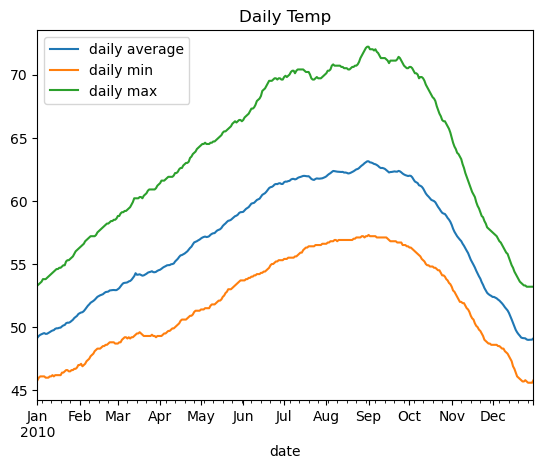

In [63]:
df.resample('D').temp.mean().plot(label='daily average')
df.resample('D').temp.min().plot(label='daily min')
df.resample('D').temp.max().plot(label='daily max')
plt.title('Daily Temp')
plt.legend()
plt.show()

In [71]:
# January is the coldest month on average and September is the hottest
df.resample('M').temp.mean().sort_values()

date
2010-01-31    49.984140
2010-12-31    50.498253
2010-02-28    52.243899
2010-03-31    53.956528
2010-11-30    55.185139
2010-04-30    55.633056
2010-05-31    57.970968
2010-10-31    60.253091
2010-06-30    60.444722
2010-07-31    61.765457
2010-08-31    62.405376
2010-09-30    62.487083
Name: temp, dtype: float64

In [67]:
df.loc['2010-01'].temp.mean()

49.984139784946244

In [74]:
daily_temp_spread_df = df.resample('D').temp.agg(['min', 'max'])

In [78]:
daily_temp_spread_df.columns = ['min_temp', 'max_temp']
daily_temp_spread_df.head()

,min_temp,max_temp
date,,
2010-01-01,45.8,53.3
2010-01-02,46.0,53.4
2010-01-03,46.1,53.5
2010-01-04,46.1,53.6
2010-01-05,46.1,53.8


In [79]:
daily_temp_spread_df['diff'] = daily_temp_spread_df.max_temp - daily_temp_spread_df.min_temp
daily_temp_spread_df.head()

,min_temp,max_temp,diff
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4
2010-01-03,46.1,53.5,7.4
2010-01-04,46.1,53.6,7.5
2010-01-05,46.1,53.8,7.7


In [81]:
# September has the highest temperature variability on average
daily_temp_spread_df.resample('M').diff.mean().sort_values()

date
2010-12-31     7.925806
2010-01-31     8.341935
2010-02-28     9.485714
2010-11-30    10.236667
2010-03-31    10.854839
2010-04-30    12.320000
2010-05-31    12.909677
2010-10-31    13.432258
2010-08-31    13.870968
2010-06-30    13.950000
2010-07-31    13.977419
2010-09-30    14.403333
Name: diff, dtype: float64

In [83]:
# August has the highest temperature variability for a single day
daily_temp_spread_df.resample('M').diff.max().sort_values()

date
2010-12-31     8.9
2010-01-31     9.3
2010-02-28     9.9
2010-11-30    11.8
2010-03-31    12.0
2010-04-30    13.0
2010-05-31    13.1
2010-10-31    14.4
2010-06-30    14.8
2010-07-31    14.8
2010-09-30    14.9
2010-08-31    15.0
Name: diff, dtype: float64

## Use seattle_weather() for next set of exercises

1. Which year and month combination has the highest amount of precipitation?
2. Visualize the amount of monthly precipitation over time.
3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.
4. Which year-month combination is the windiest?
5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)
6. In which month does it rain the most?
7. Which month has the most number of days with a non-zero amount of precipitation?


In [103]:
df = data.seattle_weather()
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [104]:
df.date = df.date.astype('datetime64')
df = df.set_index('date')
df = df.sort_index()
df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1461 entries, 2012-01-01 to 2015-12-31
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  1461 non-null   float64
 1   temp_max       1461 non-null   float64
 2   temp_min       1461 non-null   float64
 3   wind           1461 non-null   float64
 4   weather        1461 non-null   object 
dtypes: float64(4), object(1)
memory usage: 68.5+ KB


In [106]:
df.tail()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2015-12-27,8.6,4.4,1.7,2.9,fog
2015-12-28,1.5,5.0,1.7,1.3,fog
2015-12-29,0.0,7.2,0.6,2.6,fog
2015-12-30,0.0,5.6,-1.0,3.4,sun
2015-12-31,0.0,5.6,-2.1,3.5,sun


In [107]:
df.index.year

Int64Index([2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
            ...
            2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015],
           dtype='int64', name='date', length=1461)

In [108]:
df['year'] = df.index.year
df['month'] = df.index.month

In [109]:
df.head()

,precipitation,temp_max,temp_min,wind,weather,year,month
date,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012,1
2012-01-02,10.9,10.6,2.8,4.5,rain,2012,1
2012-01-03,0.8,11.7,7.2,2.3,rain,2012,1
2012-01-04,20.3,12.2,5.6,4.7,rain,2012,1
2012-01-05,1.3,8.9,2.8,6.1,rain,2012,1


In [118]:
# Dec 2015 had the highest monthly total precipitation
df.groupby(['year', 'month']).precipitation.sum().sort_values(ascending=False).head()

year  month
2015  12       284.5
2014  3        240.0
2015  11       212.6
2012  11       210.5
      3        183.0
Name: precipitation, dtype: float64

In [119]:
df.head()

,precipitation,temp_max,temp_min,wind,weather,year,month
date,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012,1
2012-01-02,10.9,10.6,2.8,4.5,rain,2012,1
2012-01-03,0.8,11.7,7.2,2.3,rain,2012,1
2012-01-04,20.3,12.2,5.6,4.7,rain,2012,1
2012-01-05,1.3,8.9,2.8,6.1,rain,2012,1


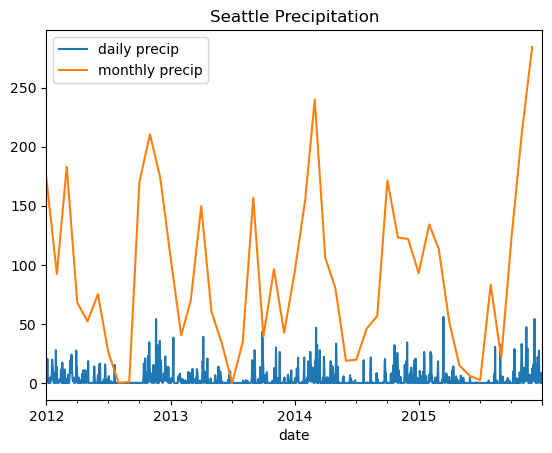

In [124]:
df.precipitation.plot(label='daily precip')
df.resample('M').precipitation.sum().plot(label='monthly precip')
plt.legend()
plt.title('Seattle Precipitation')
plt.show()

In [125]:
df.head()

,precipitation,temp_max,temp_min,wind,weather,year,month
date,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012,1
2012-01-02,10.9,10.6,2.8,4.5,rain,2012,1
2012-01-03,0.8,11.7,7.2,2.3,rain,2012,1
2012-01-04,20.3,12.2,5.6,4.7,rain,2012,1
2012-01-05,1.3,8.9,2.8,6.1,rain,2012,1


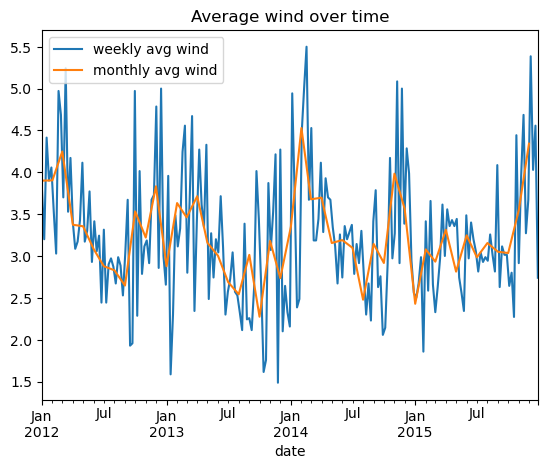

In [130]:
df.resample('7D').wind.mean().plot(label='weekly avg wind')
df.resample('M').wind.mean().plot(label='monthly avg wind')
plt.legend()
plt.title('Average wind over time')
plt.show()

In [132]:
# Feb 2014 had the highest average wind
df.groupby(['year', 'month']).wind.mean().sort_values(ascending=False).head()

year  month
2014  2        4.528571
2015  12       4.341935
2012  3        4.248387
2014  11       3.983333
2012  2        3.903448
Name: wind, dtype: float64

In [141]:
# 2013 had the most sunny days
df[df.weather == 'sun'].groupby('year').count()

,precipitation,temp_max,temp_min,wind,weather,month
year,,,,,,
2012,118,118,118,118,118,118
2013,205,205,205,205,205,205
2014,211,211,211,211,211,211
2015,180,180,180,180,180,180


In [137]:
df.groupby('year').weather.value_counts()

year  weather
2012  rain       191
      sun        118
      drizzle     31
      snow        21
      fog          5
2013  sun        205
      fog         82
      rain        60
      drizzle     16
      snow         2
2014  sun        211
      fog        151
      rain         3
2015  sun        180
      fog        173
      drizzle      7
      rain         5
Name: weather, dtype: int64

In [142]:
# In which month does it rain the most
# I will get highest average rainfall for months

# November has the highest average rain fall
df.groupby('month').precipitation.mean().sort_values(ascending=False)

month
11    5.354167
12    5.021774
3     4.888710
10    4.059677
1     3.758065
2     3.734513
4     3.128333
9     1.962500
5     1.673387
8     1.320161
6     1.107500
7     0.388710
Name: precipitation, dtype: float64

In [150]:
# December 2012 has the most days (27) with a non-zero amount of precipitation
df[df.precipitation > 0].groupby(['year', 'month']).precipitation.count().sort_values(ascending=False).head()

year  month
2012  12       27
2015  12       25
2012  1        22
      3        22
2014  3        20
Name: precipitation, dtype: int64

In [154]:
df[df.precipitation > 0].groupby(['year', 'month']).agg('count').precipitation.sort_values(ascending=False).head()

year  month
2012  12       27
2015  12       25
2012  1        22
      3        22
2014  3        20
Name: precipitation, dtype: int64

## Use the above dataset (data.flights_20k()) for the following exercises:

1. Convert any negative delays to 0.
2. Which hour of the day has the highest average delay?
3. Does the day of the week make a difference in the delay amount?
4. Does the month make a difference in the delay amount?

In [15]:
df = data.flights_20k()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         20000 non-null  datetime64[ns]
 1   delay        20000 non-null  int64         
 2   distance     20000 non-null  int64         
 3   origin       20000 non-null  object        
 4   destination  20000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 781.4+ KB


In [17]:
# This neat bit of code came from ChatGPT.  Cool.
df.loc[df['delay'] < 0, 'delay'] = 0

In [18]:
df.date = df.date.astype('datetime64')
df = df.set_index('date')
df = df.sort_index()
df.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,0,251,MDW,STL
2001-01-01 07:00:00,0,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


In [27]:
df.index.hour

Int64Index([ 0,  6,  6,  7,  7,  7,  7,  7,  7,  7,
            ...
            20, 20, 20, 20, 20, 21, 21, 21, 21, 21],
           dtype='int64', name='date', length=20000)

In [31]:
# the third hour of the day has the highest average delays
df.groupby(df.index.hour).delay.mean().sort_values(ascending=False).head()

date
3     302.500000
1     170.000000
0     127.916667
23     65.353846
22     32.704607
Name: delay, dtype: float64

In [33]:
# Days of week are Mon-Sun = 0-6
# Monday has the lowest average delays and Friday has the highest
df.groupby(df.index.weekday).delay.mean().sort_values(ascending=False)

date
4    17.757596
3    12.821322
2    11.032478
6    10.413542
1     9.410866
5     8.431498
0     7.165772
Name: delay, dtype: float64

In [34]:
# does the month make a difference in the delay amount?
# We only have three months of 2001, but Feb had the highest avg delay and March the least
df.groupby(df.index.month).delay.mean().sort_values(ascending=False)

date
2    12.306106
1    11.301592
3     9.875287
Name: delay, dtype: float64

In [35]:
df.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,0,251,MDW,STL
2001-01-01 07:00:00,0,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


In [37]:
df.tail()

,delay,distance,origin,destination
date,,,,
2001-03-31 21:02:00,26,303,MSY,HOU
2001-03-31 21:05:00,0,318,FLL,JAX
2001-03-31 21:05:00,0,451,MCI,IND
2001-03-31 21:30:00,30,174,TPA,PBI
2001-03-31 21:30:00,0,495,BWI,SDF


In [40]:
df.groupby('origin').delay.mean().sort_values(ascending=False).head()

origin
SFO    14.904110
RNO    14.774744
LAX    14.181718
SMF    13.738854
SJC    13.041667
Name: delay, dtype: float64

In [41]:
df.groupby('destination').delay.mean().sort_values(ascending=False).head()

destination
BDL    16.769912
SFO    15.000000
PHX    14.322163
LAX    14.203091
LAS    14.172809
Name: delay, dtype: float64

## Bonus - iowa_electricity()


1. For each row, calculate the percentage of the year's total that energy source provided.
2. Lineplot of generation over time, color by source
3. Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)
4. Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?
5. Is the total generation increasing over time?
    - How would you control for increasing consumption over time when considering how much energy is coming from each source?
    - express each number as a % of the year's total


In [45]:
df = data.iowa_electricity()

In [46]:
df.head()

,year,source,net_generation
0,2001-01-01,Fossil Fuels,35361
1,2002-01-01,Fossil Fuels,35991
2,2003-01-01,Fossil Fuels,36234
3,2004-01-01,Fossil Fuels,36205
4,2005-01-01,Fossil Fuels,36883


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   year            51 non-null     datetime64[ns]
 1   source          51 non-null     object        
 2   net_generation  51 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.3+ KB


In [49]:
df.source.value_counts()

Fossil Fuels      17
Nuclear Energy    17
Renewables        17
Name: source, dtype: int64

### making a new dataframe
- I want each row to consist of year for index and three columns with power generated by each of the 3 sources: Fossil Fuels, Nuclear, Renewables

In [102]:
new_df = pd.DataFrame()
new_df.head()

""


In [103]:
# first just get the year column; could have done this multiple ways
new_df['year'] = df[df.source == 'Fossil Fuels'].year
new_df.head()

,year
0,2001-01-01
1,2002-01-01
2,2003-01-01
3,2004-01-01
4,2005-01-01


In [104]:
# add the fossile fuels column
new_df['fossil_fuels'] = df[df.source == 'Fossil Fuels'].net_generation

In [105]:
# now set the index to be the datetime column, 'year'
new_df = new_df.set_index('year')
new_df.head()

,fossil_fuels
year,
2001-01-01,35361
2002-01-01,35991
2003-01-01,36234
2004-01-01,36205
2005-01-01,36883


In [106]:
# add a new column for nuclear power generated and rewnewables
#  had to use a list because otherwise the index didn't match and it added
#  a bunch of extra rows and nulls
new_df['nuclear'] = list(df[df.source == 'Nuclear Energy'].net_generation)
new_df['renewables'] = list(df[df.source == 'Renewables'].net_generation)
new_df.head()

,fossil_fuels,nuclear,renewables
year,,,
2001-01-01,35361,3853,1437
2002-01-01,35991,4574,1963
2003-01-01,36234,3988,1885
2004-01-01,36205,4929,2102
2005-01-01,36883,4538,2724


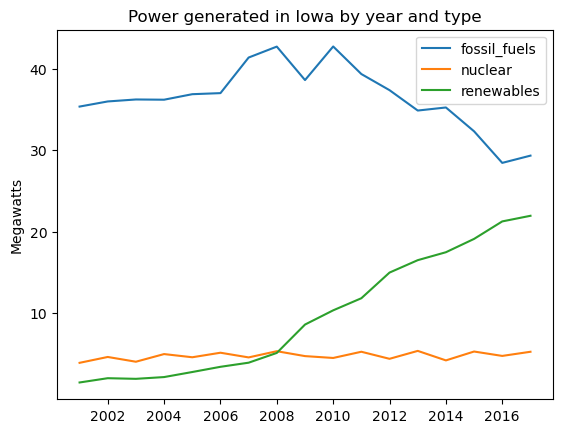

In [107]:
# now I can plot the power generated over time by each of the 3 categories
plt.plot(new_df.fossil_fuels, label='fossil_fuels')
plt.plot(new_df.nuclear, label='nuclear')
plt.plot(new_df.renewables, label='renewables')
plt.legend()
plt.title('Power generated in Iowa by year and type')
plt.yticks(ticks=[10000, 20000, 30000, 40000], labels=['10', '20', '30', '40'])
plt.ylabel('Megawatts')
plt.show()

In [140]:
# I tried multiple ways to plot using only the index, but none worked
# SO, I'm making a new column, year
new_df['year'] = new_df.index.year
new_df.head()

,fossil_fuels,nuclear,renewables,year
year,,,,
2001-01-01,35361,3853,1437,2001
2002-01-01,35991,4574,1963,2002
2003-01-01,36234,3988,1885,2003
2004-01-01,36205,4929,2102,2004
2005-01-01,36883,4538,2724,2005


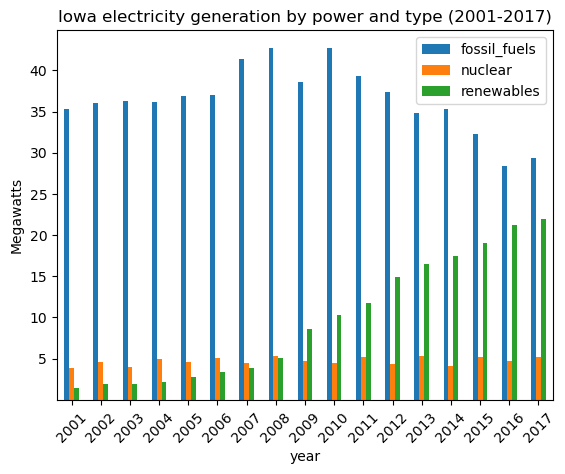

In [145]:
new_df.plot(x='year', y=['fossil_fuels', 'nuclear', 'renewables'], kind='bar', rot=45)
plt.title('Iowa electricity generation by power and type (2001-2017)')
plt.yticks(ticks = [5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000], labels=[5, 10, 15, 20, 25, 30, 35, 40])
plt.ylabel('Megawatts')
plt.show()


## Bonus - birdstrikes

In [146]:
df = data.birdstrikes()

In [148]:
df.columns = df.columns.str.lower()
df.head()

,airport__name,aircraft__make_model,effect__amount_of_damage,flight_date,aircraft__airline_operator,origin_state,when__phase_of_flight,wildlife__size,wildlife__species,when__time_of_day,cost__other,cost__repair,cost__total_$,speed_ias_in_knots
0,BARKSDALE AIR FORCE BASE ARPT,T-38A,None,1/8/90 0:00,MILITARY,Louisiana,Climb,Large,Turkey vulture,Day,0,0,0,300.0
1,BARKSDALE AIR FORCE BASE ARPT,KC-10A,None,1/9/90 0:00,MILITARY,Louisiana,Approach,Medium,Unknown bird or bat,Night,0,0,0,200.0
2,BARKSDALE AIR FORCE BASE ARPT,B-52,None,1/11/90 0:00,MILITARY,Louisiana,Take-off run,Medium,Unknown bird or bat,Day,0,0,0,130.0
3,NEW ORLEANS INTL,B-737-300,Substantial,1/11/90 0:00,SOUTHWEST AIRLINES,Louisiana,Take-off run,Small,Rock pigeon,Day,0,0,0,140.0
4,BARKSDALE AIR FORCE BASE ARPT,KC-10A,None,1/12/90 0:00,MILITARY,Louisiana,Climb,Medium,Unknown bird or bat,Day,0,0,0,160.0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Airport__Name               10000 non-null  object 
 1   Aircraft__Make_Model        10000 non-null  object 
 2   Effect__Amount_of_damage    10000 non-null  object 
 3   Flight_Date                 10000 non-null  object 
 4   Aircraft__Airline_Operator  10000 non-null  object 
 5   Origin_State                10000 non-null  object 
 6   When__Phase_of_flight       10000 non-null  object 
 7   Wildlife__Size              10000 non-null  object 
 8   Wildlife__Species           10000 non-null  object 
 9   When__Time_of_day           10000 non-null  object 
 10  Cost__Other                 10000 non-null  int64  
 11  Cost__Repair                10000 non-null  int64  
 12  Cost__Total_$               10000 non-null  int64  
 13  Speed_IAS_in_knots          7164

In [150]:
df.flight_date.astype('datetime64')

0      1990-01-08
1      1990-01-09
2      1990-01-11
3      1990-01-11
4      1990-01-12
          ...    
9995   2002-07-24
9996   2002-07-24
9997   2002-07-24
9998   2002-07-25
9999   2002-07-25
Name: flight_date, Length: 10000, dtype: datetime64[ns]